## **Exploratory Data Analysis** 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Get the dataset into a pandas dataframe for easier processing

In [8]:
heart_df = pd.read_csv('heart.csv')
heart_df.head(10) #gives us the first 10 rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Most feature names(eg: cp, trestbps etc.) are abbreviated. So we'll very briefly try to understand what they mean (only the ones are not obvious):

<div>
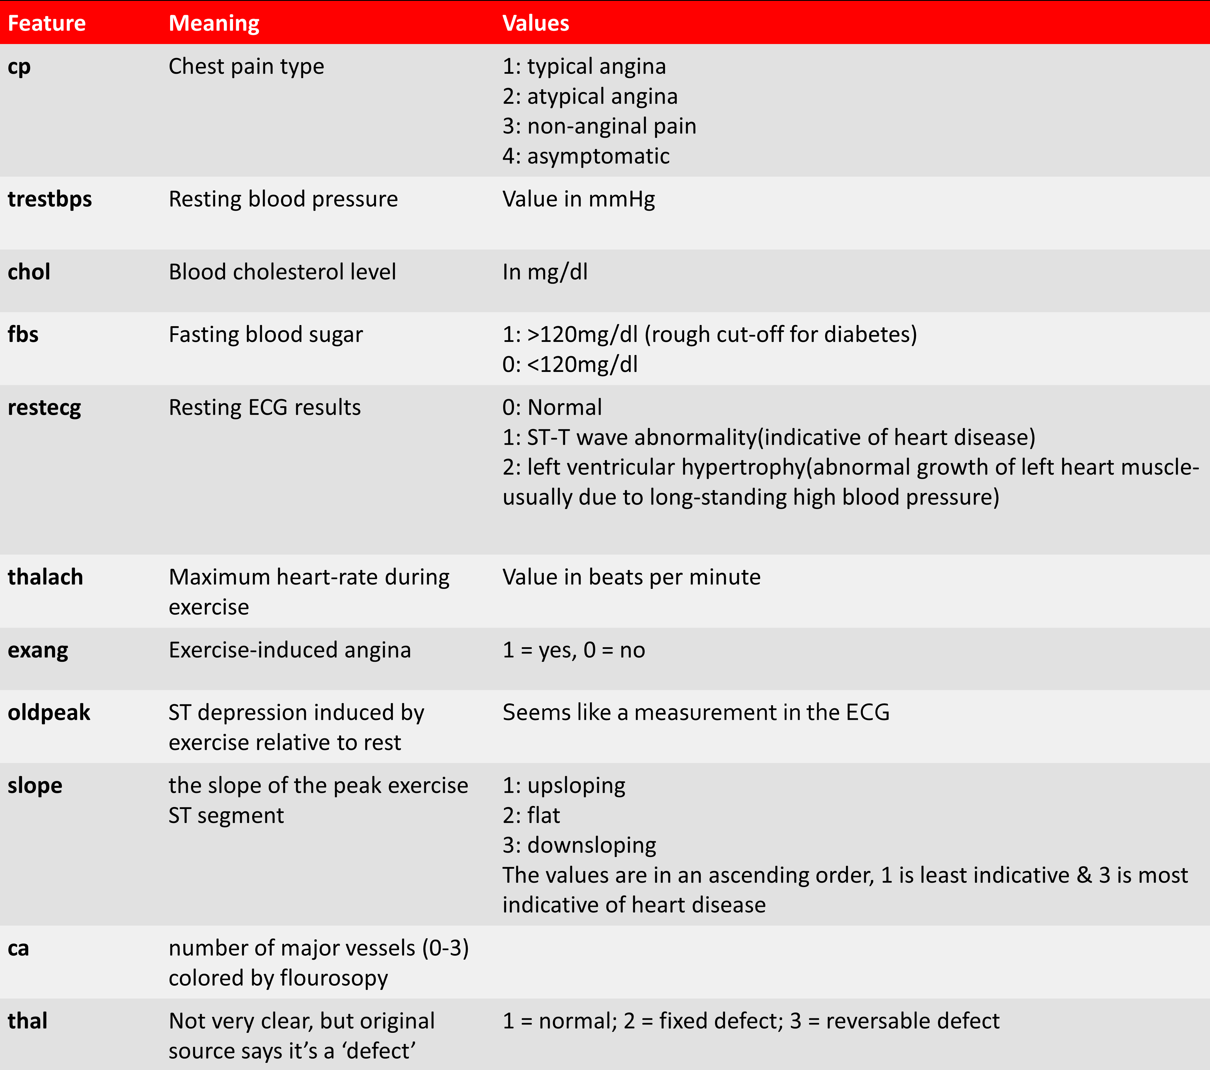
</div>


['sex', 'cp', 'restecg','exang', 'slope', 'ca', 'thal' ]

#### Target: 0 = less likely to have a heart attack 1 = more likely to have a heart attack

Descriptive analysis

In [9]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


There were 303 patients, ranging in age from 29 to 77 years. The "count" showed no null values

In [10]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values. 

In [11]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


`info()` method gives us the data types of each feature. int means integer, and float means floating points. But, as we explored, some of these are better represented as categorical variables, because the categories have a meaning, and an 'order'. For example, cp or chest pain type has 4 values: '1' says typical angina. Angina refers to the chest pain that  occurs due to a blockage in heart vessels. So '1' is most indicative of heart disease, and '4' is least indicative. 

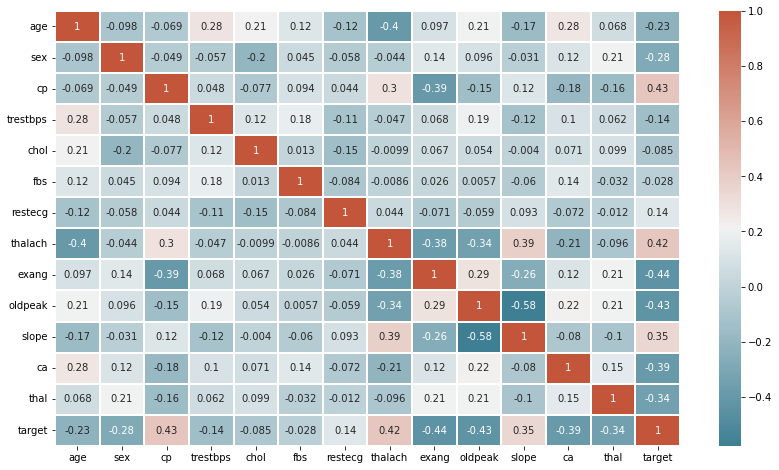

In [12]:
pearson = heart_df.corr()

cmap = sns.diverging_palette(220, 20, as_cmap=True)
_, ax = plt.subplots(figsize=(14,8))
ax = sns.heatmap (pearson, annot=True, linewidth=2, cmap=cmap)

In [13]:
cat_features = ['sex', 'cp','fbs', 'restecg','exang', 'slope', 'ca', 'thal' ]
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
label = 'target'

In [14]:
heart_df[cat_features] = heart_df[cat_features].astype('category')

In [15]:
heart_df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

In [16]:
heart_df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
heart_df.exang.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [18]:
datatype = heart_df.exang.dtype

print(datatype)

category


In [19]:
heart_df.groupby(heart_df.target).chol.mean()

target
0    251.086957
1    242.230303
Name: chol, dtype: float64

<AxesSubplot:xlabel='target', ylabel='chol'>

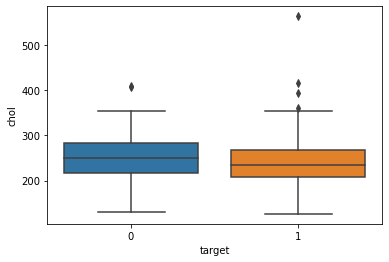

In [47]:
sns.boxplot(x='target', y='chol', data=heart_df)

Despite having a person with a cholesterol level of above 500, heart disease group shows no significant difference in the mean cholesteroal levels compared to no heart disase group. Outliers like this 500+ value can sway the mean towards a higher value. 

<AxesSubplot:xlabel='target', ylabel='thalach'>

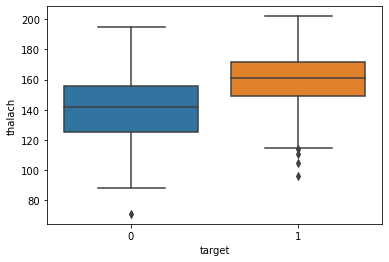

In [48]:
sns.boxplot(x='target', y='thalach', data=heart_df)

<AxesSubplot:xlabel='target', ylabel='trestbps'>

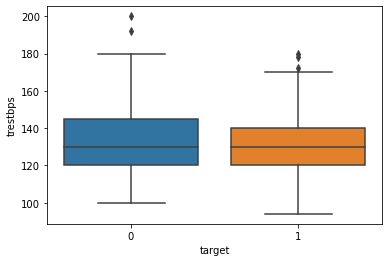

In [49]:
sns.boxplot(x='target', y='trestbps', data=heart_df)

In [21]:
heart_pt_percentage = len(heart_df.loc[heart_df['target']==1])/len(heart_df)*100
heart_pt_percentage

54.45544554455446

Text(0.5, 1.0, 'Heart Attack % is: 54.46')

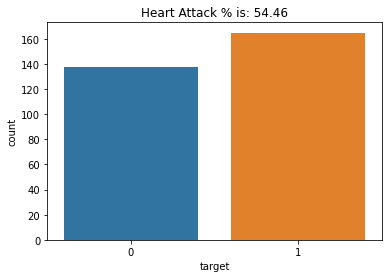

In [50]:
#plotting target
ax = sns.countplot(x='target', data=heart_df)
ax.set_title(f'Heart Attack % is:{heart_pt_percentage: .2f}')

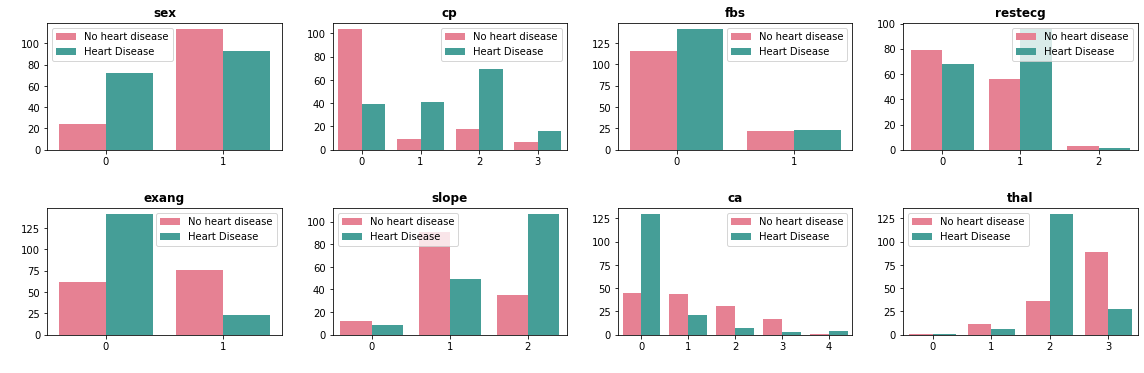

In [24]:
plt.figure(figsize = (16,10))
for i,col in enumerate(cat_features):
    plt.subplot(4,4,i+1)
    sns.countplot(data = heart_df , x = col, palette = "husl", hue = 'target' )
    plt.title(col,weight = 'bold', color = 'black')
    plt.legend(['No heart disease','Heart Disease'])
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

Based on the above exploration, the variables thal and restecg were rearranged in "order" because in thal, fixed defects have the greatest weight in predicting heart disease, while ST changes in restecg have the greatest weight in a similar manner.

In [25]:
#value counts before reordering
heart_df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [26]:
heart_df['restecg'] = heart_df['restecg'].replace({0:0, 1:2, 2:1})

In [27]:
#check after reordering:
heart_df.restecg.value_counts()

1    156
0    147
Name: restecg, dtype: int64

In [28]:
heart_df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [30]:
heart_df['thal'] = heart_df['thal'].replace({1:1, 2:3, 3:2}) 

In [31]:
heart_df.thal

0      1
1      2
2      2
3      2
4      2
      ..
298    2
299    2
300    2
301    2
302    2
Name: thal, Length: 303, dtype: category
Categories (3, int64): [0, 1, 2]

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(heart_df, heart_df["target"]):
    strat_train = heart_df.loc[train_index]
    strat_test = heart_df.loc[test_index]

In [34]:
X_train = strat_train.drop('target', axis=1)
y_train = strat_train['target']
x_test = strat_test.drop('target', axis=1)
y_test = strat_test['target']

In [35]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
260,66,0,0,178,228,1,1,165,1,1.0,1,2,2
289,55,0,0,128,205,0,1,130,1,2.0,1,1,2
237,60,1,0,140,293,0,0,170,0,1.2,1,2,2
144,76,0,2,140,197,0,1,116,0,1.1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
def rf(xs, y, n_estimators=40,
max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
    max_features=max_features,
    min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [38]:
X_train.shape, y_train.shape

((227, 13), (227,))

In [39]:
rf_model = rf(X_train, y_train)

In [40]:
#predicting on validation set and evaluating
from sklearn.metrics import classification_report
train_preds = rf_model.predict(X_train)
print(classification_report(train_preds, y_train))
y_preds = rf_model.predict(x_test)
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        96
           1       0.95      0.90      0.93       131

    accuracy                           0.92       227
   macro avg       0.91      0.92      0.92       227
weighted avg       0.92      0.92      0.92       227

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.88      0.78      0.83        46

    accuracy                           0.80        76
   macro avg       0.80      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76



In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = [
{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 600], 'max_features': [0.5, 'sqrt', 'log2'], 'min_samples_leaf':[4], 
 'n_jobs':[-1]},
{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': [0.5, 'sqrt', 'log2'],  
 'n_jobs':[-1]}, 
   ]

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5,
scoring='accuracy',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [0.5, 'sqrt', 'log2'],
                          'min_samples_leaf': [4],
                          'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                           450, 500, 600],
                          'n_jobs': [-1]},
                         {'max_features': [0.5, 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                           450, 500],
                          'n_jobs': [-1]}],
             return_train_score=True, scoring='accuracy')

In [43]:
grid_search.best_params_


{'max_features': 'log2', 'n_estimators': 100, 'n_jobs': -1}

In [44]:
rf_model2 = RandomForestClassifier( oob_score=True, n_estimators=200, max_features='sqrt', n_jobs=-1, max_depth=5, min_samples_leaf=4)
rf_model2.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=200, n_jobs=-1, oob_score=True)

In [45]:
from sklearn.metrics import classification_report
train_preds = rf_model2.predict(X_train)
print(classification_report(train_preds, y_train))
y_preds = rf_model2.predict(x_test)
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        91
           1       0.97      0.88      0.92       136

    accuracy                           0.91       227
   macro avg       0.91      0.92      0.91       227
weighted avg       0.92      0.91      0.91       227

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        31
           1       0.83      0.76      0.79        45

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76

